In [1]:
#!pip3 install sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 

In [3]:
dataset = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [4]:
dataset.isnull().any()

Timestamp            False
Open                  True
High                  True
Low                   True
Close                 True
Volume_(BTC)          True
Volume_(Currency)     True
Weighted_Price        True
dtype: bool

In [5]:
dataset.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [6]:
dataset.shape

(4857377, 8)

In [7]:
dataset.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset['Date'] = pd.to_datetime(dataset['Timestamp'], unit='s').dt.date


In [9]:
dataset.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


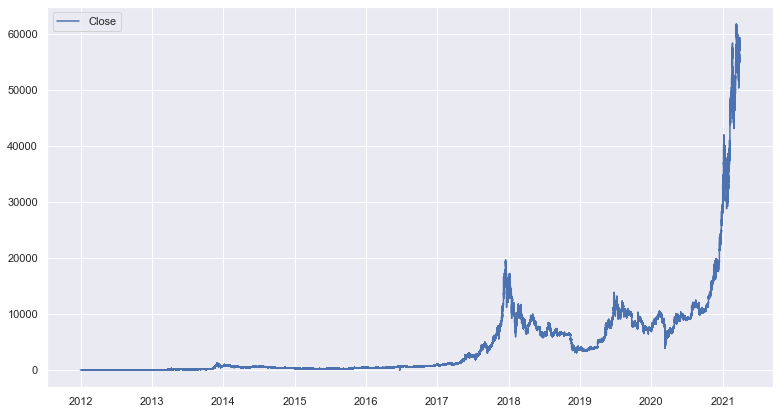

In [10]:
sns.set()
plt.rcParams["figure.figsize"] = (13,7)
plt.plot(dataset['Date'], dataset['Close'],label='Close')
plt.legend()

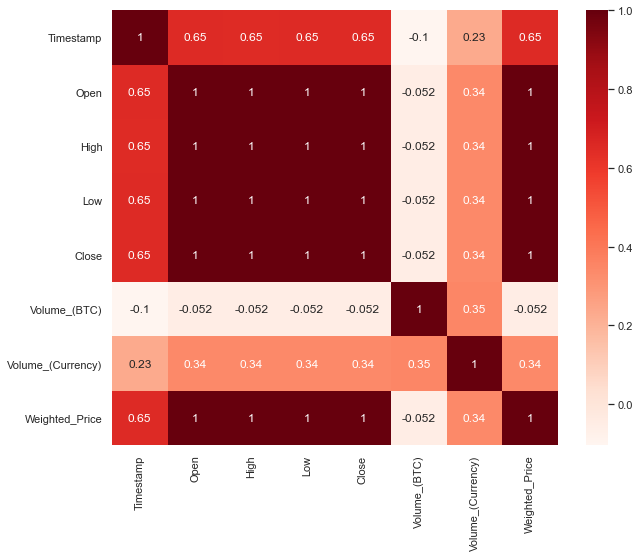

In [11]:
plt.figure(figsize=(10,8))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.head()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01


In [14]:
dataset = dataset.groupby('Date').agg({'Open':'first',
                                     'High':'max', 
                                     'Low':'min',  
                                     'Close': 'last',
                                     'Volume_(BTC)': 'sum',
                                     'Volume_(Currency)': 'sum',
                                     'Weighted_Price': 'last'})


In [15]:

# dataset = group[['High_Low', 'Open_Close','Close','Volume_(BTC)', 'Volume_(Currency)','Weighted_Price']].mean()
# dataset = group[['High', 'Low', 'Open','Close','Volume_(BTC)', 'Volume_(Currency)','Weighted_Price']].mean()
dataset.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338,4.580000
2012-01-01,4.58,5.00,4.58,5.00,21.602000,105.779160,5.000000
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
2012-01-03,5.32,5.32,5.14,5.29,88.037281,464.805210,5.290000
2012-01-04,4.93,5.57,4.93,5.57,107.233260,568.076197,5.442972


In [16]:
dataset.shape

(3376, 7)

In [17]:
dataset['High_Low'] = (dataset['High'] - dataset['Low']) / dataset['Low']
dataset['Open_Close'] = (dataset['Close'] - dataset['Open']) / dataset['Open']

dataset = dataset[['High_Low', 'Open_Close', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]


In [18]:
dataset['Prediction']=dataset['Close'].shift(-30)
dataset.head()

,High_Low,Open_Close,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Prediction
Date,,,,,,,
2011-12-31,0.043280,0.043280,4.58,95.317878,425.320338,4.580000,5.58
2012-01-01,0.091703,0.091703,5.00,21.602000,105.779160,5.000000,5.30
2012-01-02,0.000000,0.000000,5.00,19.048000,95.240000,5.000000,5.88
2012-01-03,0.035019,-0.005639,5.29,88.037281,464.805210,5.290000,6.28
2012-01-04,0.129817,0.129817,5.57,107.233260,568.076197,5.442972,6.30


In [19]:
X = np.array(dataset.drop(['Prediction'],1))
X=preprocessing.scale(X)
X_forecast = X[-30:]  #last 30 samples
X = X[:-30]

y = np.array(dataset['Prediction'])
y = y[:-30]


C:\Users\AbdulK\AppData\Local\Temp/ipykernel_21104/1813227804.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(dataset.drop(['Prediction'],1))


# Linear Regression


In [20]:
totalR2, totalRMSE, totalMAE = 0,0,0
rep_num = 100 # repetition number
for i in range(rep_num):    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state=42
    )
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    totalR2 += lr.score(X_test, y_test)
    y_pred = lr.predict(X_test)
    totalRMSE += mean_squared_error(y_test, y_pred, squared=False)
    totalMAE += mean_absolute_error(y_test, y_pred)

print('Logistic Regression R2', totalR2/rep_num)
print('Logistic Regression RMSE', totalRMSE/rep_num)
print('Logistic Regression MAE', totalMAE/rep_num)

Logistic Regression R2 0.9489053446979588
Logistic Regression RMSE 2026.1594717673436
Logistic Regression MAE 1003.3087321558124


In [21]:
# forecast_prediction = lr.predict(X_forecast)
# print(forecast_prediction)

In [22]:
# Random Forest

In [23]:

totalR2, totalRMSE, totalMAE = 0,0,0
rep_num = 20
for i in range(rep_num):    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state=42
    )
    rf=RandomForestRegressor(n_estimators=200,random_state=101)
    rf.fit(X_train,y_train)
    totalR2 += rf.score(X_test,y_test)
    y_pred = rf.predict(X_test)
    totalRMSE += mean_squared_error(y_test, y_pred, squared=False)
    totalMAE += mean_absolute_error(y_test, y_pred)

print('Random Forest R2', totalR2/rep_num)
print('Random Forest RMSE', totalRMSE/rep_num)
print('Random Forest MAE', totalMAE/rep_num)

Random Forest R2 0.9607851698391331
Random Forest RMSE 1775.0519032669472
Random Forest MAE 709.2824292828684


In [24]:
# Support Vector Regression

In [25]:
totalR2, totalRMSE, totalMAE = 0,0,0
rep_num = 20  #epetition number
for i in range(rep_num):    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state=42
    )
    svr = SVR(kernel='linear', C=100, gamma='auto')
    svr.fit(X_train, y_train)
    totalR2 += svr.score(X_test, y_test)
    y_pred = svr.predict(X_test)
    totalRMSE += mean_squared_error(y_test, y_pred, squared=False)
    totalMAE += mean_absolute_error(y_test, y_pred)

print('SVR R2', totalR2/rep_num)
print('SVR RMSE', totalRMSE/rep_num)
print('SVR MAE', totalMAE/rep_num)

SVR R2 0.9355658672463806
SVR RMSE 2275.327318094346
SVR MAE 906.9339995840852


In [26]:
# Neural Network

In [27]:
totalR2, totalRMSE, totalMAE = 0,0,0
rep_num = 20 #repetition number
for i in range(rep_num):    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.3,
        random_state=42
    )
    mlp = MLPRegressor(hidden_layer_sizes=(50,),  random_state=1, max_iter=25000).fit(X_train, y_train)
    totalR2 += mlp.score(X_test, y_test)
    y_pred = mlp.predict(X_test)
    totalRMSE += mean_squared_error(y_test, y_pred, squared=False)
    totalMAE += mean_absolute_error(y_test, y_pred)

print('MLP R2', totalR2/rep_num)
print('MLP RMSE', totalRMSE/rep_num)
print('MLP MAE', totalMAE/rep_num)

MLP R2 0.9486406203061687
MLP RMSE 2031.4015159555545
MLP MAE 874.9350502081735
